Best hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


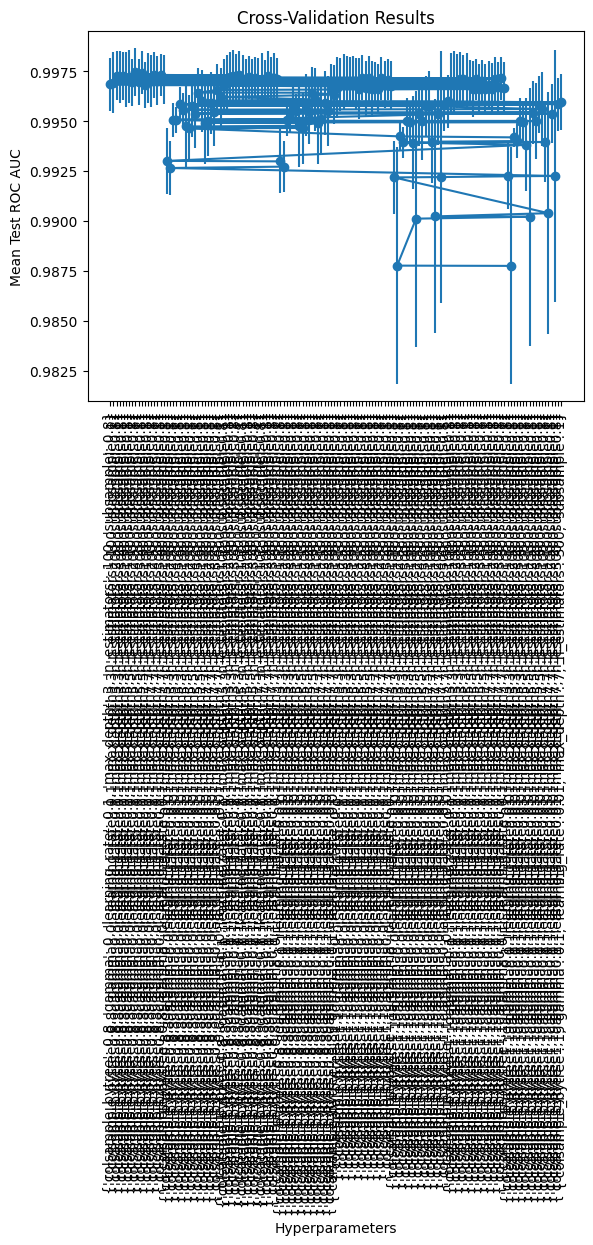

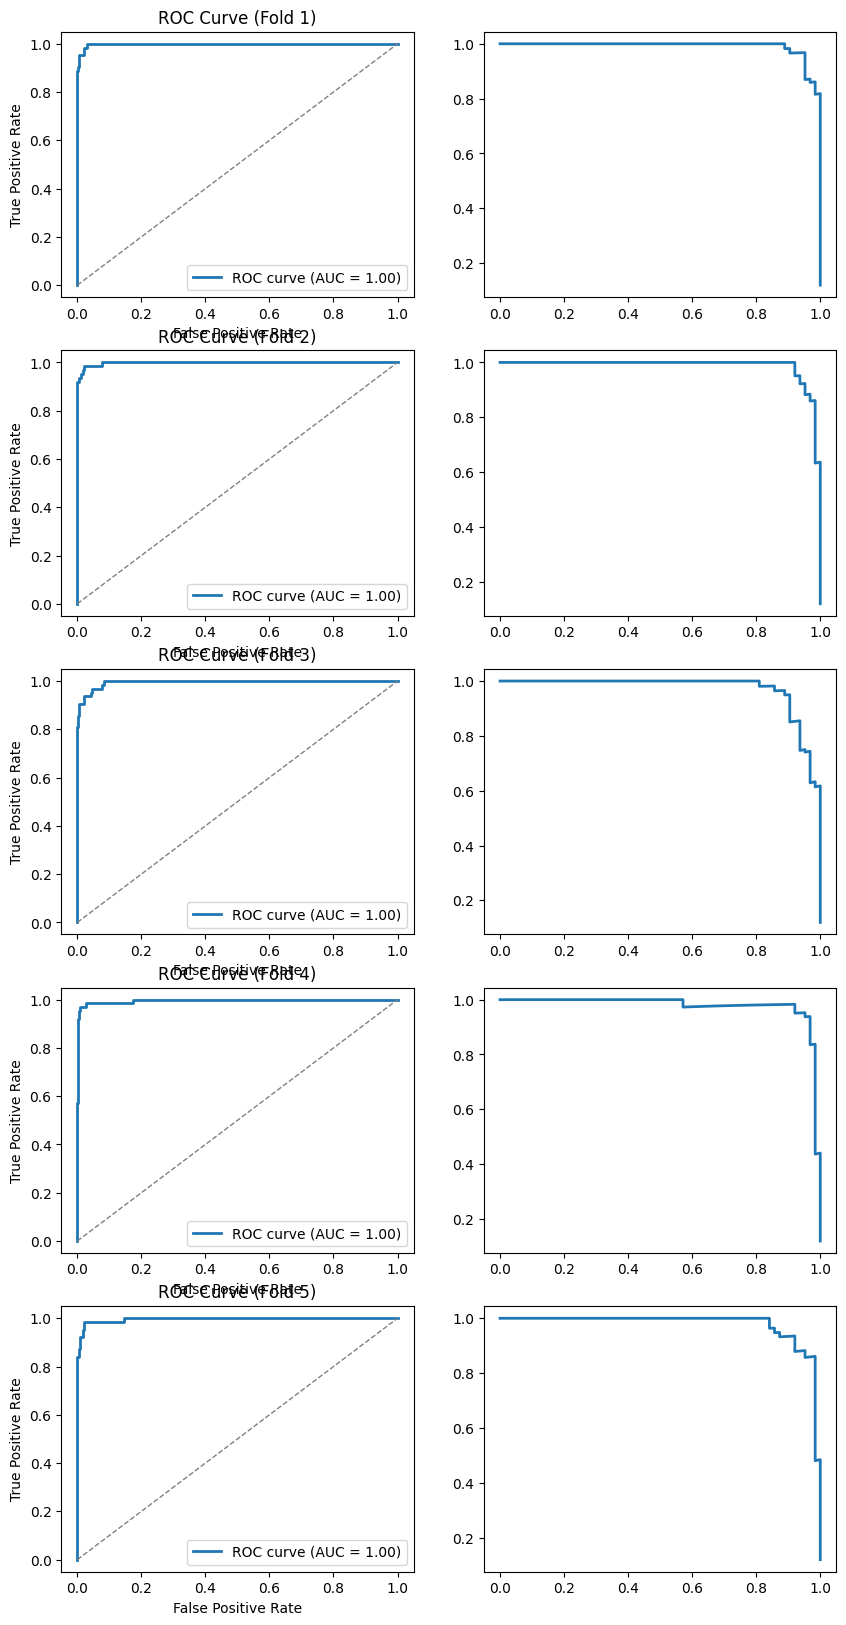

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
#X = data.drop('', axis=1)
X=data.iloc[:,2:data.shape[1]-1]
y = data['label']

# Define the parameter grid for tuning
param_grid = {'learning_rate': [0.1, 0.01],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300],
              'subsample': [0.8, 1],
              'colsample_bytree': [0.8, 1],
              'gamma': [0, 0.1]}

# Define the XGBoost classifier
clf = xgb.XGBClassifier()

# Define the k-fold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using k-fold cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Visualize the cross-validation results
results = pd.DataFrame(grid_search.cv_results_)
results = results[['mean_test_score', 'std_test_score', 'params']]
results = results.sort_values(by='mean_test_score', ascending=False)

plt.errorbar(results.index, results['mean_test_score'], yerr=results['std_test_score'], marker='o')
plt.xticks(results.index, results['params'], rotation=90)
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Test ROC AUC')
plt.title('Cross-Validation Results')
plt.show()

# Plot ROC and PRC curves for each fold
folds = cv.split(X, y)
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,20))
for i, (train, test) in enumerate(folds):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict_proba(X.iloc[test])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[test], y_pred)
    roc_auc = auc(fpr, tpr)
    ax[i][0].plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[i][0].plot([0, 1], [0, 1], '--', color='gray', lw=1)
    ax[i][0].set_xlim([-0.05, 1.05])
    ax[i][0].set_ylim([-0.05, 1.05])
    ax[i][0].set_xlabel('False Positive Rate')
    ax[i][0].set_ylabel('True Positive Rate')
    ax[i][0].set_title('ROC Curve (Fold %d)' % (i+1))
    ax[i][0].legend(loc="lower right")
    precision, recall, thresholds = precision_recall_curve(y.iloc[test], y_pred)
    ap = average_precision_score(y.iloc[test], y_pred)
    ax[i][1].plot(recall, precision, lw=2, label='PRC curve (AP = %0.2f)' % ap)


Best hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


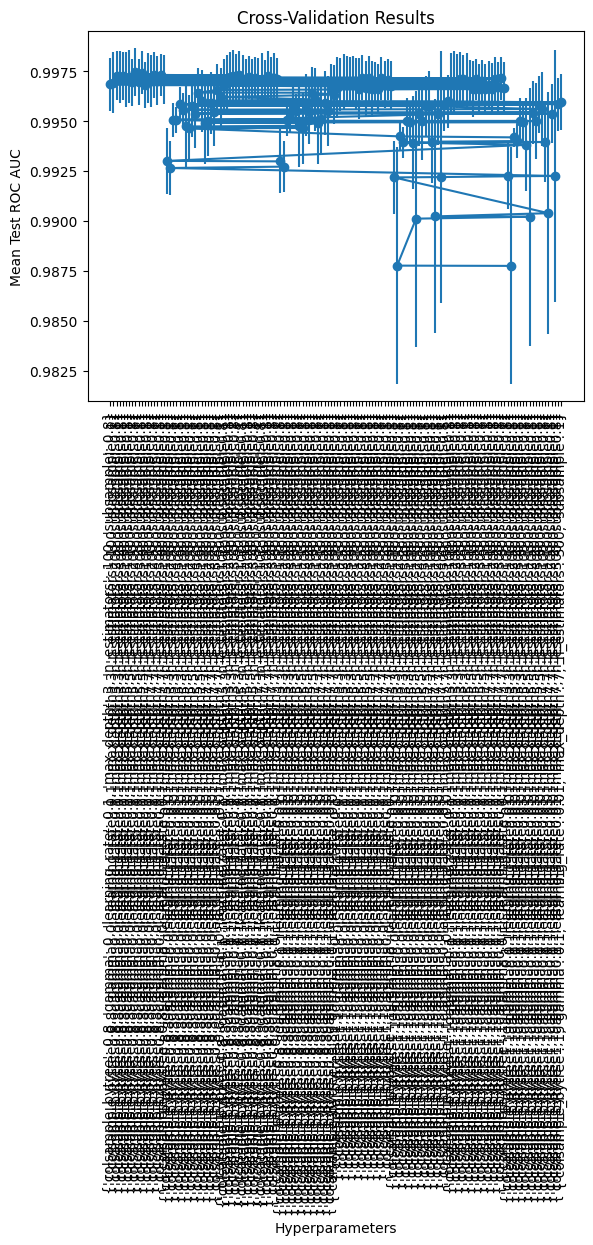

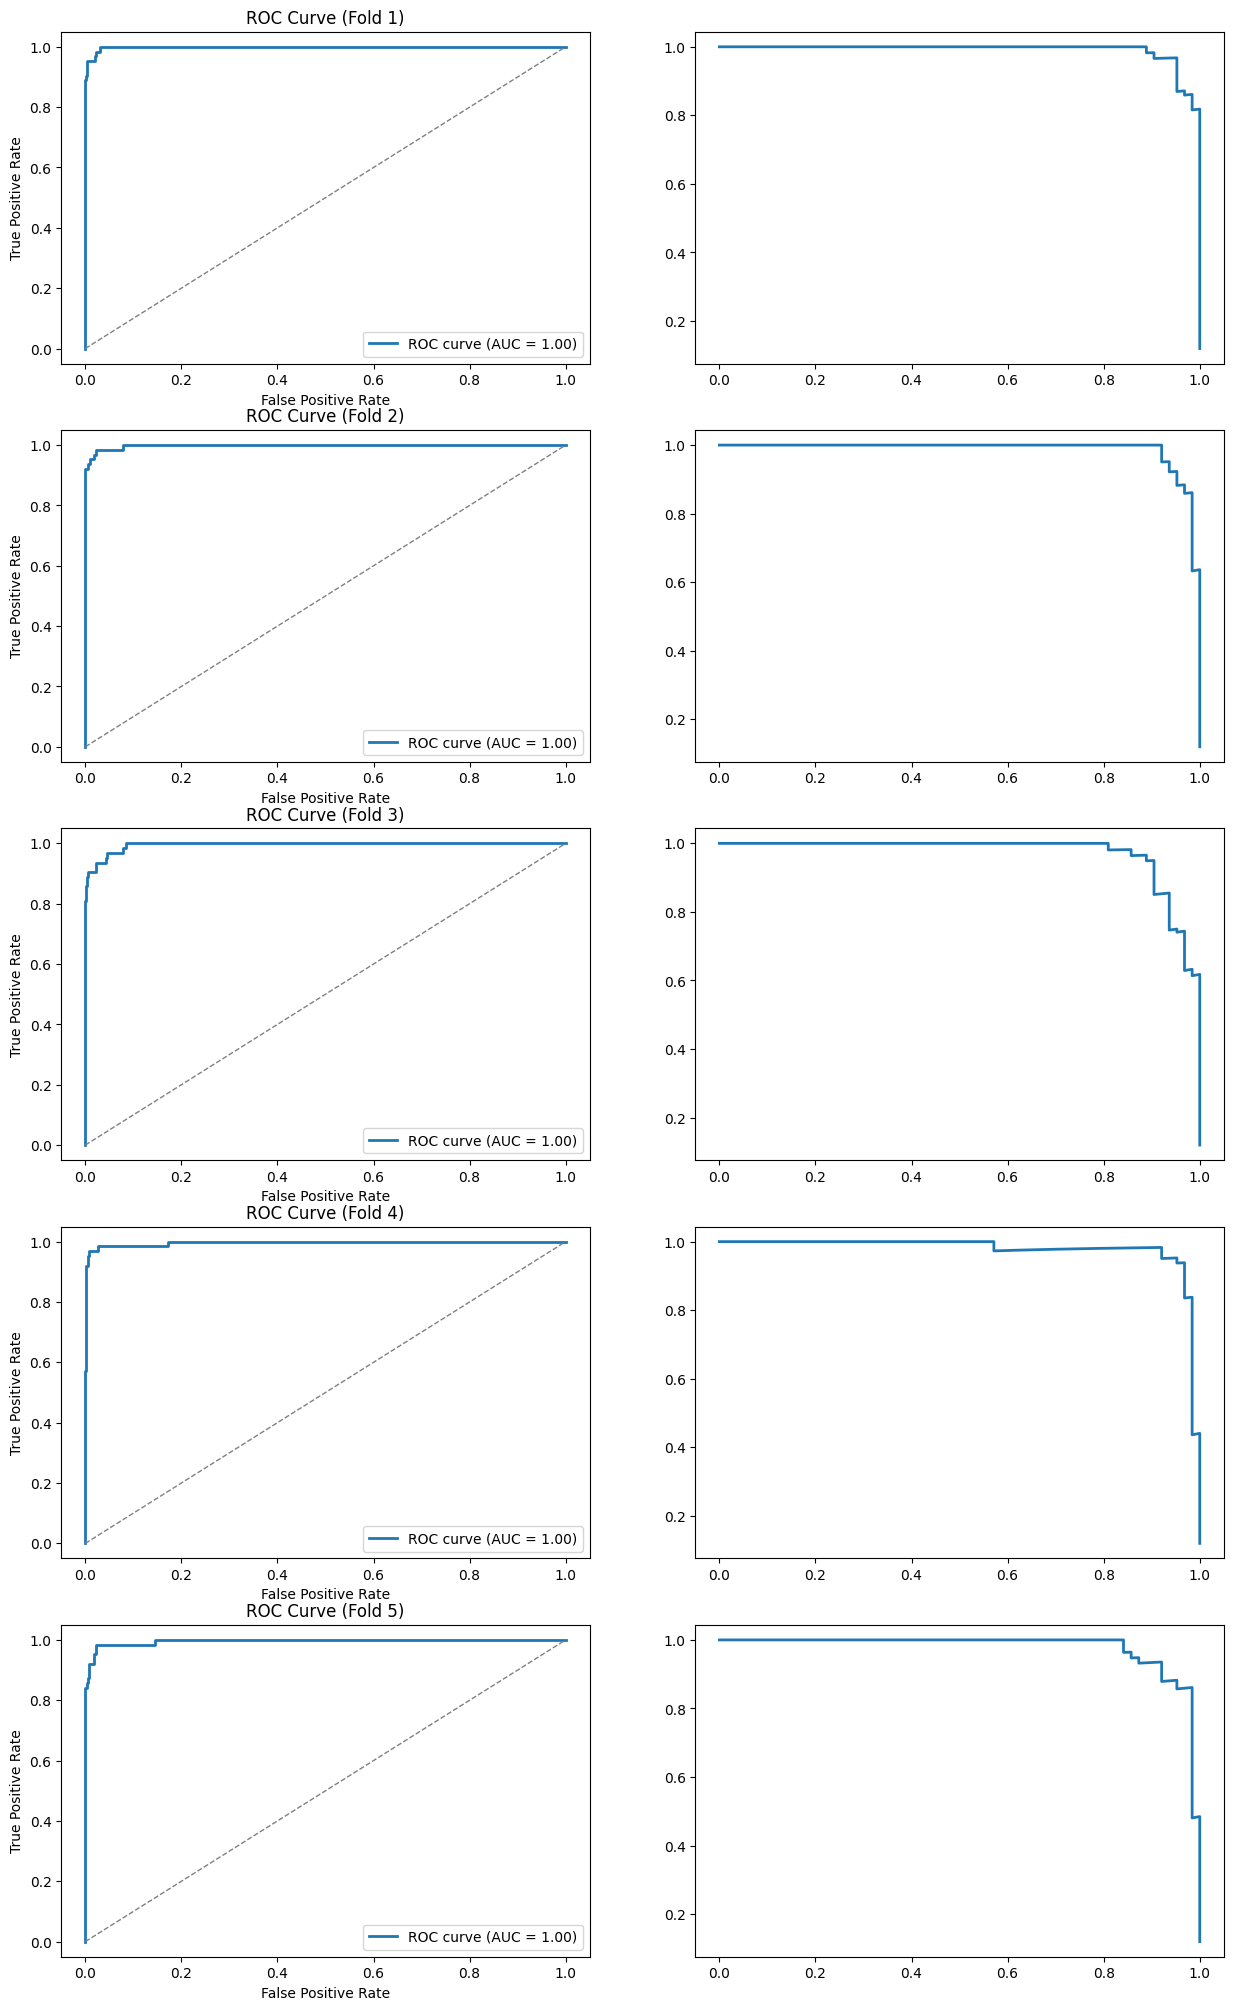

In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_AGTTC.csv')
#X = data.drop('', axis=1)
X=data.iloc[:,2:data.shape[1]-1]
y = data['label']


# Define the parameter grid for tuning
param_grid = {'learning_rate': [0.1, 0.01],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300],
              'subsample': [0.8, 1],
              'colsample_bytree': [0.8, 1],
              'gamma': [0, 0.1]}

# Define the XGBoost classifier
clf = xgb.XGBClassifier()

# Define the k-fold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using k-fold cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Visualize the cross-validation results
results = pd.DataFrame(grid_search.cv_results_)
results = results[['mean_test_score', 'std_test_score', 'params']]
results = results.sort_values(by='mean_test_score', ascending=False)

plt.errorbar(results.index, results['mean_test_score'], yerr=results['std_test_score'], marker='o')
plt.xticks(results.index, results['params'], rotation=90)
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Test ROC AUC')
plt.title('Cross-Validation Results')
plt.show()

# Plot ROC and PRC curves for each fold in one figure
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
for i, (train, test) in enumerate(cv.split(X, y)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict_proba(X.iloc[test])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[test], y_pred)
    roc_auc = auc(fpr, tpr)
    ax[i][0].plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[i][0].plot([0, 1], [0, 1], '--', color='gray', lw=1)
    ax[i][0].set_xlim([-0.05, 1.05])
    ax[i][0].set_ylim([-0.05, 1.05])
    ax[i][0].set_xlabel('False Positive Rate')
    ax[i][0].set_ylabel('True Positive Rate')
    ax[i][0].set_title('ROC Curve (Fold %d)' % (i+1))
    ax[i][0].legend(loc="lower right")
    precision, recall, thresholds = precision_recall_curve(y.iloc[test], y_pred)
    ap = average_precision_score(y.iloc[test], y_pred)
    ax[i][1].plot(recall, precision, lw=2, label='PRC curve (AP = %0.2f)' )
